# Feature Selection & Visualization: CDC Heart Disease Dataset

Megan Petralia 

3/12/2022


### Sources:

_[This](https://www.kaggle.com/kanncaa1/feature-selection-and-data-visualization)_ article was used for reference.

The following dataset has been chosen from _[Kaggle](kaggle.com)_

The goal here is to illustrate feature visualization and selection using several methods. 
- Feature selection with correlation, univariate feature selection, recursive feature elimination, recursive feature elimination with cross validation and tree based feature selection methods are used with random forest classification. 
- Apart from these, principle component analysis are used to observe number of components.

#### __[Personal Key Indicators of Heart Disease Dataset](https://www.kaggle.com/kamilpytlak/personal-key-indicators-of-heart-disease)__  

Dataset information from Kaggle:

2020 annual CDC survey data of 400k adults related to their health status

"According to the CDC, heart disease is one of the leading causes of death for people of most races in the US (African Americans, American Indians and Alaska Natives, and white people). About half of all Americans (47%) have at least 1 of 3 key risk factors for heart disease: high blood pressure, high cholesterol, and smoking. Other key indicator include diabetic status, obesity (high BMI), not getting enough physical activity or drinking too much alcohol. Detecting and preventing the factors that have the greatest impact on heart disease is very important in healthcare. Computational developments, in turn, allow the application of machine learning methods to detect "patterns" from the data that can predict a patient's condition."


Attribute Information : 
- HeartDisease: Class column for whether respondent has ever reported having coronary heart disease (CHD) or myocardial infraction (MI) . True/False
- BMI : Body Mass Index (BMI)
- Smoking: Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] . True/False
- AlcoholDrinking: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week. True/False
- Stroke : (Ever told) (you had) a stroke? True/False
- Physical Health: Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0-30 days)
- MentalHealth: Thinking about your mental health, for how many days during the past 30 days was your mental health not good? (0-30 days). 
- DiffWalking: Do you have serious difficulty walking or climbing stairs? True/False
- Sex: Gender. Are you male or female? 
- AgeCategory: Fourteen-level age category. '65-69' Most common
- Race: Imputed race/ethnicity value
- Diabetic: (Ever told) (you had) diabetes? Yes/No
- Physical Activity: Adults who reported doing physical activity or exercise during the past 30 days other than their regular job. True/False
- GenHealth: Would you say that in general your health is... (Very good, Good... etc.)
- SleepTime: On average, how many hours of sleep do you get in a 24-hour period?
- Asthma: (Ever told) (you had) asthma? True/False
- KidneyDisease: Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease? True/False
- SkinCancer: (Ever told) (you had) skin cancer? True/False




# Data Analysis

In [1]:
#Call packages to be used below
import warnings; warnings.filterwarnings('ignore')

# Load packages
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
#import time
from subprocess import check_output

In [2]:
#Import Data
data = pd.read_csv('heart_2020_cleaned.csv')

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

Taking a snapshot of the dataset, you can see all the features available. The first column 'HeartDisease' will be the target class label.

In [3]:
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


Separate the classification label we want to predict from the rest of the features.

In [3]:
# y includes our labels and x includes our features
y = data.HeartDisease # No or Yes 
x = data.drop('HeartDisease',axis = 1 )
x.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


Number without Heart Disease:  292422
Number with Heart Disease :  27373


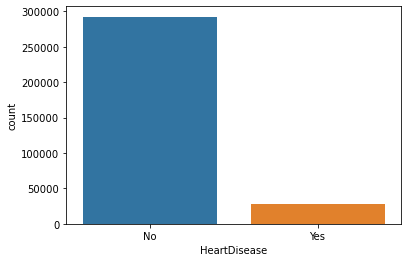

In [4]:
ax = sns.countplot(y,label="Count") # N = 292,422, Y = 27,373
No, Yes = y.value_counts()
print('Number without Heart Disease: ', No)
print('Number with Heart Disease : ', Yes)

There are significantly more No's than Yes's. Will need to rebalance the dataset by taking a smaller sample of the 'No' s. 

In [49]:
#Also taking a smaller sample than what's available for faster computing below
Nos = data[data.HeartDisease == 'No'].sample(5000)
Yess = data[data.HeartDisease == 'Yes'].sample(5000)
data_balanced = Nos.append(Yess)

In [50]:
# y includes our labels and x includes our features
y = data_balanced.HeartDisease # No or Yes 
x = data_balanced.drop('HeartDisease',axis = 1 )

Number without Heart Disease:  5000
Number with Heart Disease :  5000


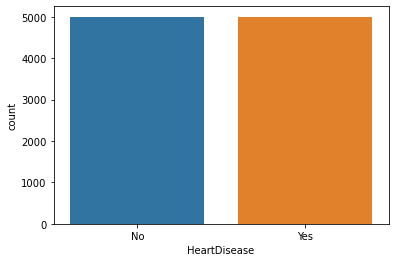

In [60]:
ax = sns.countplot(y,label="Count") # N = 292,422, Y = 27,373
No, Yes = y.value_counts()
print('Number without Heart Disease: ', No)
print('Number with Heart Disease : ', Yes)

Taking a look at the categorical variables.

In [51]:
categorical_vars = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'Diabetic' , 'PhysicalActivity', 
   'Asthma', 'KidneyDisease', 'SkinCancer' , 'AgeCategory' , 'Race' , 'GenHealth']
x_categorical = x[categorical_vars]
x_categorical[categorical_vars] = x[categorical_vars].astype("category")
x_categorical.describe()

,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,Diabetic,PhysicalActivity,Asthma,KidneyDisease,SkinCancer,AgeCategory,Race,GenHealth
count,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
unique,2,2,2,2,2,4,2,2,2,2,13,6,5
top,No,No,No,No,Male,No,Yes,No,No,No,70-74,White,Good
freq,5033,9431,9073,7642,5294,7541,7181,8492,9231,8684,1356,7928,3223


In [52]:
for col in x_categorical.columns:
    print(x_categorical[col].value_counts())

No     5033
Yes    4967
Name: Smoking, dtype: int64
No     9431
Yes     569
Name: AlcoholDrinking, dtype: int64
No     9073
Yes     927
Name: Stroke, dtype: int64
No     7642
Yes    2358
Name: DiffWalking, dtype: int64
Male      5294
Female    4706
Name: Sex, dtype: int64
No                         7541
Yes                        2165
No, borderline diabetes     230
Yes (during pregnancy)       64
Name: Diabetic, dtype: int64
Yes    7181
No     2819
Name: PhysicalActivity, dtype: int64
No     8492
Yes    1508
Name: Asthma, dtype: int64
No     9231
Yes     769
Name: KidneyDisease, dtype: int64
No     8684
Yes    1316
Name: SkinCancer, dtype: int64
70-74          1356
80 or older    1316
65-69          1285
60-64          1146
75-79          1036
55-59           831
50-54           675
45-49           443
40-44           438
35-39           428
18-24           399
30-34           326
25-29           321
Name: AgeCategory, dtype: int64
White                             7928
Hispanic      

# Feature Engineering

Encode binary categorical features as 0 for No and 1 for Yes, 0 for male and 1 for female.

In [53]:
x_numeric = x.replace({"Smoking":      {"Yes": 1, "No": 0},
            "AlcoholDrinking": {"Yes": 1, "No": 0},
            "Stroke": {"Yes": 1, "No": 0},
            "DiffWalking": {"Yes": 1, "No": 0},
            "Sex": {"Male": 1, "Female": 0},
            "Diabetic": {"Yes": 1, "No": 0, 'No, borderline diabetes': 0, 'Yes (during pregnancy)': 1},
            "PhysicalActivity": {"Yes": 1, "No": 0},
            "Asthma": {"Yes": 1, "No": 0},
            "KidneyDisease": {"Yes": 1, "No": 0},
            "SkinCancer": {"Yes": 1, "No": 0}
            })
x_numeric.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
252463,29.16,0,0,0,1.0,2.0,0,1,75-79,White,1,1,Very good,5.0,1,0,1
283058,29.53,1,0,0,0.0,0.0,1,1,80 or older,White,0,1,Good,6.0,0,0,1
33612,30.41,0,0,0,0.0,0.0,0,1,70-74,White,0,1,Very good,8.0,0,0,0
156927,29.26,0,0,0,0.0,0.0,0,0,55-59,White,0,1,Good,8.0,0,0,1
249546,34.96,0,0,0,0.0,0.0,0,0,55-59,Black,1,1,Very good,7.0,0,1,0


Encode the non-binary categorical features sing 'OneHot' encoding 

In [54]:
x_numeric = pd.get_dummies(x_numeric, columns=["AgeCategory" , "Race", "GenHealth"])
x_numeric.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Diabetic,PhysicalActivity,...,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
252463,29.16,0,0,0,1.0,2.0,0,1,1,1,...,0,0,0,0,1,0,0,0,0,1
283058,29.53,1,0,0,0.0,0.0,1,1,0,1,...,0,0,0,0,1,0,0,1,0,0
33612,30.41,0,0,0,0.0,0.0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,1
156927,29.26,0,0,0,0.0,0.0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
249546,34.96,0,0,0,0.0,0.0,0,0,1,1,...,0,1,0,0,0,0,0,0,0,1


Looking at the distribution of each feature

In [55]:
x_numeric.describe()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Diabetic,PhysicalActivity,...,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.00000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000
mean,28.778230,0.496700,0.056900,0.092700,5.27520,4.10040,0.235800,0.52940,0.222900,0.718100,...,0.017200,0.069500,0.070500,0.032300,0.79280,0.142700,0.1742,0.322300,0.079700,0.281100
std,6.404551,0.500014,0.231663,0.290026,9.87505,8.41646,0.424519,0.49916,0.416213,0.449947,...,0.130023,0.254315,0.256001,0.176805,0.40532,0.349784,0.3793,0.467381,0.270842,0.449559
min,12.210000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0000,0.000000,0.000000,0.000000
25%,24.410000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.0000,0.000000,0.000000,0.000000
50%,27.710000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,1.00000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.0000,0.000000,0.000000,0.000000
75%,31.930000,1.000000,0.000000,0.000000,5.00000,3.00000,0.000000,1.00000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.0000,1.000000,0.000000,1.000000
max,87.050000,1.000000,1.000000,1.000000,30.00000,30.00000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.0000,1.000000,1.000000,1.000000


# Additional Visualization

Creating a scatter plot to visualize the relationship between MentalHealth and PhysicalHealth.

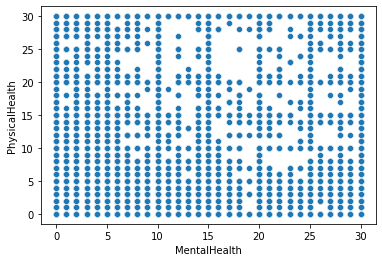

In [84]:
sns.scatterplot(data["MentalHealth"] , data["PhysicalHealth"])

Scatter plots show relation between mental and physical health for each race. No strong correlations present, but a lot more of the heart disease individuals reported seem to have race = white.

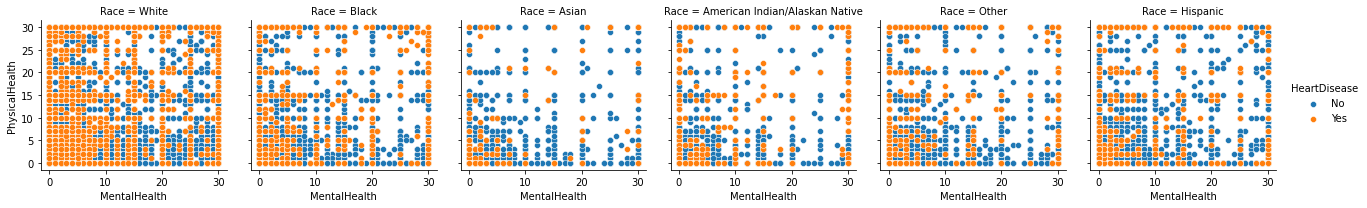

In [57]:
g = sns.FacetGrid(data[['HeartDisease', 'PhysicalHealth', 'MentalHealth', 'Race' , 'GenHealth']] , col = 'Race', hue = 'HeartDisease' )
g.map_dataframe(sns.scatterplot, x="MentalHealth", y="PhysicalHealth")
g.add_legend()

Correlation plot shown below. Since there are so many features, the correlation is hard to see. 

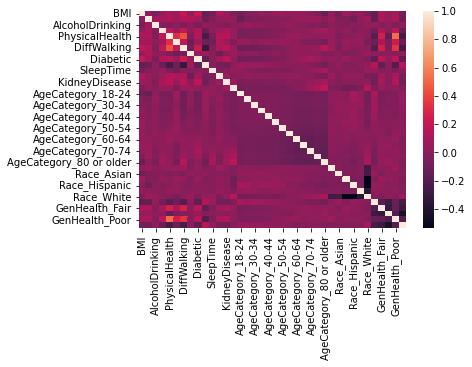

In [58]:
corrs = x_numeric.corr()
sns.heatmap(corrs, annot = False)
#plt.savefig("correlations.pdf")

In [85]:
x_numeric.corr()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Diabetic,PhysicalActivity,...,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
BMI,1.000000,0.019437,-0.050418,0.027345,0.110231,0.064947,0.191712,0.035898,0.207984,-0.139050,...,-0.079944,0.072470,-0.001215,0.030245,-0.039374,-0.146988,0.124539,0.043026,0.079439,-0.083301
Smoking,0.019437,1.000000,0.078031,0.101073,0.133195,0.073987,0.147369,0.123204,0.092198,-0.110600,...,-0.051429,-0.031622,-0.091548,0.015347,0.073114,-0.137118,0.103750,0.046704,0.110870,-0.096201
AlcoholDrinking,-0.050418,0.078031,1.000000,-0.015996,-0.035742,0.008713,-0.051019,0.024018,-0.057908,0.019574,...,-0.012573,-0.024691,-0.008625,-0.008250,0.028648,0.026910,-0.024038,0.008878,-0.030842,0.008695
Stroke,0.027345,0.101073,-0.015996,1.000000,0.189190,0.073130,0.209093,0.010532,0.122926,-0.116244,...,-0.021069,0.030608,-0.022028,0.000113,-0.008444,-0.098863,0.119565,-0.007210,0.172030,-0.120103
PhysicalHealth,0.110231,0.133195,-0.035742,0.189190,1.000000,0.315348,0.446811,-0.042200,0.162970,-0.256982,...,-0.033986,0.006321,-0.008387,0.029907,-0.015661,-0.180952,0.257250,-0.145743,0.530293,-0.244214
MentalHealth,0.064947,0.073987,0.008713,0.073130,0.315348,1.000000,0.188918,-0.108517,0.040718,-0.109702,...,-0.019947,0.038511,0.028463,0.029543,-0.064818,-0.108344,0.124657,-0.048422,0.239590,-0.114879
DiffWalking,0.191712,0.147369,-0.051019,0.209093,0.446811,0.188918,1.000000,-0.077555,0.233993,-0.314296,...,-0.046307,0.030680,-0.019545,-0.005548,-0.008383,-0.192953,0.261010,-0.030739,0.344508,-0.245685
Sex,0.035898,0.123204,0.024018,0.010532,-0.042200,-0.108517,-0.077555,1.000000,0.039458,0.063400,...,0.010699,-0.044066,-0.032266,0.003404,0.050379,0.008905,-0.004868,0.005034,-0.016224,0.001719
Diabetic,0.207984,0.092198,-0.057908,0.122926,0.162970,0.040718,0.233993,0.039458,1.000000,-0.140795,...,-0.006170,0.042597,0.007373,0.000004,-0.039216,-0.161488,0.175294,0.033722,0.160889,-0.154240
PhysicalActivity,-0.139050,-0.110600,0.019574,-0.116244,-0.256982,-0.109702,-0.314296,0.063400,-0.140795,1.000000,...,0.021346,-0.031533,-0.021064,0.002582,0.034495,0.143149,-0.153491,-0.013523,-0.210358,0.158917


## Visualizing High-Dimensional Data using PCA, *t*-SNE & UMAP

Explained variation per principal component: [0.53147238 0.25435764 0.18648236 0.01203415]
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.000s...
[t-SNE] Computed neighbors for 10000 samples in 3.120s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.116648
[t-SNE] KL divergence after 250 iterations with early exaggeratio

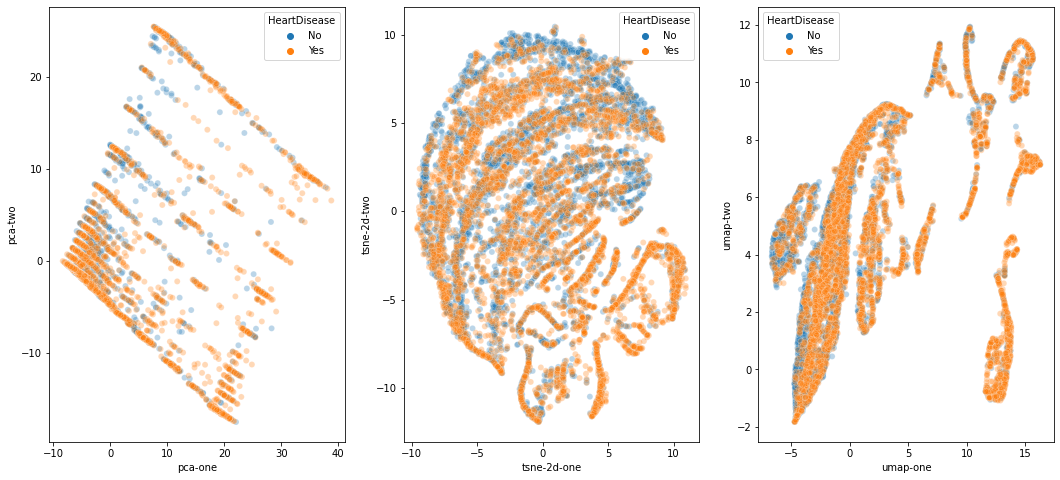

In [59]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

#splitting up into a smaller random sample to demonstrate but with faster processing.
#Current volume takes ~5min


x_sample = x_numeric
df = x_sample.loc[:,['GenHealth_Excellent','Stroke', 'DiffWalking']]

# PCA
pca = PCA(n_components=4)
pca_result = pca.fit_transform(x_sample)
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
df['pca-one'] = pca_result[:,0]; df['pca-two'] = pca_result[:,1]

# UMAP 
# umap_results = umap.UMAP(n_neighbors=5,min_dist=0.3,metric='correlation').fit_transform(x)
umap_results = umap.UMAP().fit_transform(x_sample)
df['umap-one'] = umap_results[:,0]; df['umap-two'] = umap_results[:,1]

# t-SNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(x_sample)
df['tsne-2d-one'] = tsne_results[:,0]; df['tsne-2d-two'] = tsne_results[:,1]

# Plot Visualizations
plt.figure(figsize=(18,8))
ax1 = plt.subplot(1, 3, 1)
sns.scatterplot(x="pca-one", y="pca-two",hue=y,data=df,legend="full",alpha=0.3,ax=ax1)
ax2 = plt.subplot(1, 3, 2)
sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two",hue=y,data=df,legend="full",alpha=0.3,ax=ax2)
ax3 = plt.subplot(1, 3, 3)
sns.scatterplot(x="umap-one", y="umap-two",hue=y,data=df,legend="full",alpha=0.3,ax=ax3)

# Feature Selection

Selecting features using different methods and `scikit learn` package:
- Univariate feature selection: F-Test, Chi-Square Test, Mutual Information
- Recursive feature elimination with cross validation (RFECV): Implements model-based feature selection and optimizes number of selected features

# Baseline MLP Model with All Features

In [61]:
import warnings; warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(x_numeric, y, test_size=0.25, random_state=42)

# Specify Classifier
mlp = MLPClassifier(max_iter=100)

# Hyper-parameter space to optimize MLP
parameter_space = {
    'hidden_layer_sizes': [(8,4), (24,12), (48,24), (96,48)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05, 0.1],
    'learning_rate': ['constant','adaptive'],
}

# Note: the max_iter=100 that you defined on the initializer is not in the grid. 
# So, that number will be constant, while the ones in the grid will be searched.

# Run Search
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train, y_train)

# Note: the parameter n_jobs is to define how many CPU cores from your computer to use 
# (-1 is for all the cores available). The cv is the number of splits for cross-validation.

GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=100), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05, 0.1],
                         'hidden_layer_sizes': [(8, 4), (24, 12), (48, 24),
                                                (96, 48)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

In [62]:
# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

0.714 (+/-0.054) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (8, 4), 'learning_rate': 'constant', 'solver': 'sgd'}
0.761 (+/-0.006) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (8, 4), 'learning_rate': 'constant', 'solver': 'adam'}
0.717 (+/-0.049) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (8, 4), 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.763 (+/-0.007) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (8, 4), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.742 (+/-0.025) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (24, 12), 'learning_rate': 'constant', 'solver': 'sgd'}
0.757 (+/-0.009) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (24, 12), 'learning_rate': 'constant', 'solver': 'adam'}
0.743 (+/-0.016) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (24, 12), 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.756 (+/-0.010) for {'activatio

In [63]:
# Best parameter set
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (8, 4), 'learning_rate': 'adaptive', 'solver': 'adam'}


In [64]:
# Now you can use the clf to make new predictions. 
# For example, check the performance on your test set.    
y_true, y_pred = y_test , clf.predict(X_test)

# Confustion Matrix
from sklearn.metrics import f1_score,confusion_matrix
cm = confusion_matrix(y_true,y_pred)
print('Confusion Matrix:\n', cm, '\n')
#sns.heatmap(cm,annot=True,fmt="d", annot_kws={"size": 12}) # font size

# Classification Report
from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

Confusion Matrix:
 [[905 367]
 [235 993]] 

Results on the test set:
              precision    recall  f1-score   support

          No       0.79      0.71      0.75      1272
         Yes       0.73      0.81      0.77      1228

    accuracy                           0.76      2500
   macro avg       0.76      0.76      0.76      2500
weighted avg       0.76      0.76      0.76      2500



# Feature Selection: Filters, Wrappers, Embedded Methods

F-Test Feature Scores List: 
 [8.48955427e-02 5.54739768e-01 3.56065332e-02 6.80718023e-01
 7.38229320e-01 3.32928551e-02 1.00000000e+00 1.73170106e-01
 8.07764974e-01 2.55735319e-01 1.41949834e-02 3.13082633e-02
 3.61259970e-01 2.03533014e-01 3.92470081e-01 2.77365809e-01
 2.54662639e-01 2.83707375e-01 1.81843897e-01 1.58802257e-01
 4.64339580e-02 1.91298148e-02 9.86049925e-03 7.34034830e-02
 2.05763055e-01 2.77846900e-01 4.94992585e-01 1.25738004e-02
 5.68672732e-02 1.72091562e-02 8.70813103e-02 8.50267304e-04
 1.03635675e-01 7.39463498e-01 5.35646837e-01 6.09977660e-02
 5.29503995e-01 4.24159879e-01]
Feature List: 
 Index(['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth',
       'MentalHealth', 'DiffWalking', 'Sex', 'Diabetic', 'PhysicalActivity',
       'SleepTime', 'Asthma', 'KidneyDisease', 'SkinCancer',
       'AgeCategory_18-24', 'AgeCategory_25-29', 'AgeCategory_30-34',
       'AgeCategory_35-39', 'AgeCategory_40-44', 'AgeCategory_45-49',
       'AgeCategory_50-

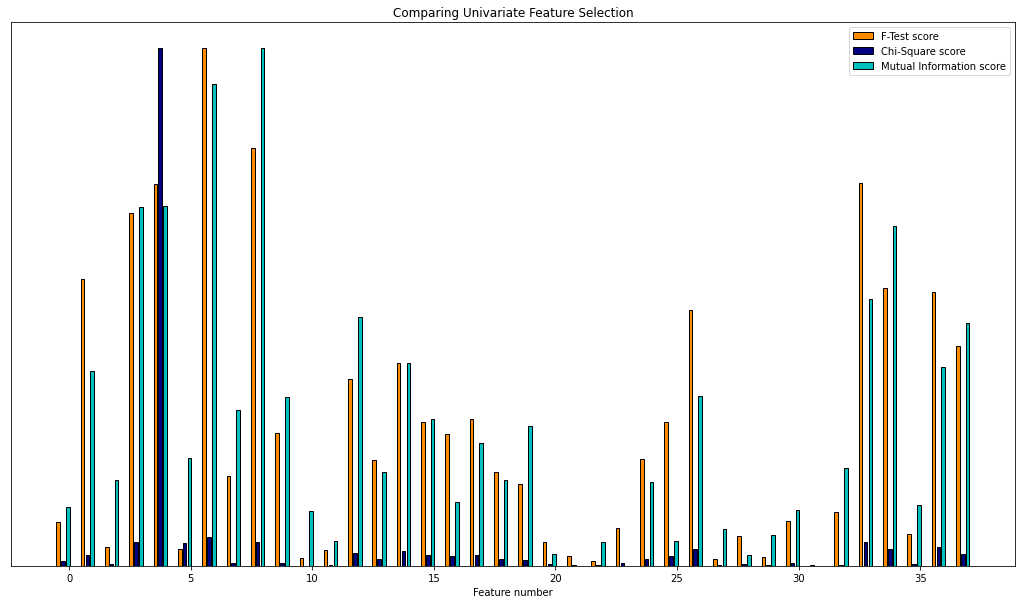

In [76]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif


# Get ready to plot scores from Univariate Feature Selection Methods
plt.figure(figsize=(18,10)); plt.clf()
x_indices = np.arange(x_numeric.shape[-1])

# SelectKBest Features using F-Test
x_new_f = SelectKBest(f_classif, k=8)
x_new_f.fit_transform(x_numeric, y)
scores = x_new_f.scores_
scores /= scores.max()
plt.bar(x_indices - .45, scores, width=.15,
        label='F-Test score', color='darkorange',
        edgecolor='black')

# Print Selected Features
print('F-Test Feature Scores List: \n', x_new_f.scores_)
print('Feature List: \n', x_numeric.columns, '\n')


# SelectKBest Features using Chi-Square Test
x_new_chi2 = SelectKBest(chi2, k=8)
x_new_chi2.fit_transform(x_numeric, y)
#scores = x_new_chi2.pvalues_
#scores = -np.log10(x_new_chi2.pvalues_)
scores = x_new_chi2.scores_
scores /= scores.max()
plt.bar(x_indices - .25, scores, width=.15,
        label='Chi-Square score', color='navy',
        edgecolor='black')

# Print Selected Features
print('Chi-Square Test Feature Scores List: \n', x_new_chi2.scores_)
print('Feature List: \n', x_numeric.columns, '\n')

# SelectKBest Features using Mutual Information
x_new_mi = SelectKBest(mutual_info_classif, k=8)
x_new_mi.fit_transform(x_numeric, y)
scores = x_new_mi.scores_
scores /= scores.max()
plt.bar(x_indices - .05, scores, width=.15,
        label='Mutual Information score', color='c',
        edgecolor='black')

# Print Selected Features
print('Mutual Information Feature Scores List: \n', x_new_mi.scores_)
print('Feature List: \n', x_numeric.columns, '\n')

# Finish Plotting
plt.title("Comparing Univariate Feature Selection")
plt.xlabel('Feature number')
plt.yticks(())
plt.axis('tight')
plt.legend(loc='upper right')
plt.show()

# Re-Run to Get Datasets
x_new_f = SelectKBest(f_classif, k=8).fit_transform(x_numeric, y)
x_new_chi2 = SelectKBest(chi2, k=8).fit_transform(x_numeric, y)
x_new_mi = SelectKBest(mutual_info_classif, k=8).fit_transform(x_numeric, y)

Features Selected Based on F- Test

In [77]:
# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(x_new_f, y, test_size=0.25, random_state=42)

# Specify Classifier
mlp = MLPClassifier(max_iter=100)

# Hyper-parameter space to optimize MLP
parameter_space = {
    'hidden_layer_sizes': [(8,4), (24,12), (48,24), (96,48)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05, 0.1],
    'learning_rate': ['constant','adaptive'],
}

# Run Search
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train, y_train)

# Best parameter set
print('Best parameters found:\n', clf.best_params_,'\n')

# Now you can use the clf to make new predictions. 
# For example, check the performance on your test set.    
y_true, y_pred = y_test , clf.predict(X_test)

# Confustion Matrix
from sklearn.metrics import f1_score,confusion_matrix
cm = confusion_matrix(y_true,y_pred)
print('Confusion Matrix:\n', cm, '\n')
#sns.heatmap(cm,annot=True,fmt="d", annot_kws={"size": 12}) # font size

# Classification Report
from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

Best parameters found:
 {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (96, 48), 'learning_rate': 'adaptive', 'solver': 'adam'} 

Confusion Matrix:
 [[917 355]
 [470 758]] 

Results on the test set:
              precision    recall  f1-score   support

          No       0.66      0.72      0.69      1272
         Yes       0.68      0.62      0.65      1228

    accuracy                           0.67      2500
   macro avg       0.67      0.67      0.67      2500
weighted avg       0.67      0.67      0.67      2500



Chi-Squared

In [78]:
# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(x_new_chi2, y, test_size=0.25, random_state=42)

# Specify Classifier
mlp = MLPClassifier(max_iter=100)

# Hyper-parameter space to optimize MLP
parameter_space = {
    'hidden_layer_sizes': [(8,4), (24,12), (48,24), (96,48)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05, 0.1],
    'learning_rate': ['constant','adaptive'],
}

# Run Search
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train, y_train)

# Best parameter set
print('Best parameters found:\n', clf.best_params_,'\n')

# Now you can use the clf to make new predictions. 
# For example, check the performance on your test set.    
y_true, y_pred = y_test , clf.predict(X_test)

# Confustion Matrix
from sklearn.metrics import f1_score,confusion_matrix
cm = confusion_matrix(y_true,y_pred)
print('Confusion Matrix:\n', cm, '\n')
#sns.heatmap(cm,annot=True,fmt="d", annot_kws={"size": 12}) # font size

# Classification Report
from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

Best parameters found:
 {'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': (48, 24), 'learning_rate': 'constant', 'solver': 'adam'} 

Confusion Matrix:
 [[895 377]
 [440 788]] 

Results on the test set:
              precision    recall  f1-score   support

          No       0.67      0.70      0.69      1272
         Yes       0.68      0.64      0.66      1228

    accuracy                           0.67      2500
   macro avg       0.67      0.67      0.67      2500
weighted avg       0.67      0.67      0.67      2500



Mutual Information

In [79]:
# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(x_new_mi, y, test_size=0.25, random_state=42)

# Specify Classifier
mlp = MLPClassifier(max_iter=100)

# Hyper-parameter space to optimize MLP
parameter_space = {
    'hidden_layer_sizes': [(8,4), (24,12), (48,24), (96,48)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05, 0.1],
    'learning_rate': ['constant','adaptive'],
}

# Run Search
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train, y_train)

# Best parameter set
print('Best parameters found:\n', clf.best_params_, '\n')

# Now you can use the clf to make new predictions. 
# For example, check the performance on your test set.    
y_true, y_pred = y_test , clf.predict(X_test)

# Confustion Matrix
from sklearn.metrics import f1_score,confusion_matrix
cm = confusion_matrix(y_true,y_pred)
print('Confusion Matrix:\n', cm, '\n')
#sns.heatmap(cm,annot=True,fmt="d", annot_kws={"size": 12}) # font size

# Classification Report
from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

Best parameters found:
 {'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (24, 12), 'learning_rate': 'adaptive', 'solver': 'adam'} 

Confusion Matrix:
 [[884 388]
 [371 857]] 

Results on the test set:
              precision    recall  f1-score   support

          No       0.70      0.69      0.70      1272
         Yes       0.69      0.70      0.69      1228

    accuracy                           0.70      2500
   macro avg       0.70      0.70      0.70      2500
weighted avg       0.70      0.70      0.70      2500



RFE (Recursive Feature Elimination) with Cross-Validation

In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

# Split data into training and testing
x_train,x_test, y_train, y_test = train_test_split(x_numeric, y, test_size=0.25, random_state=42)

# Specify Classifier:
clf = RandomForestClassifier() 

# "Accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=clf, step=1, cv=StratifiedKFold(2), scoring='accuracy') #5-fold cross-validation
rfecv = rfecv.fit(x_train, y_train)

print('Optimal Number of Features :', rfecv.n_features_, '\n')
print('Best Features :', x_train.columns[rfecv.support_], '\n')

Optimal Number of Features : 32 

Best Features : Index(['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth',
       'MentalHealth', 'DiffWalking', 'Sex', 'Diabetic', 'PhysicalActivity',
       'SleepTime', 'Asthma', 'KidneyDisease', 'SkinCancer',
       'AgeCategory_18-24', 'AgeCategory_35-39', 'AgeCategory_40-44',
       'AgeCategory_45-49', 'AgeCategory_50-54', 'AgeCategory_55-59',
       'AgeCategory_60-64', 'AgeCategory_65-69', 'AgeCategory_70-74',
       'AgeCategory_75-79', 'AgeCategory_80 or older', 'Race_Black',
       'Race_White', 'GenHealth_Excellent', 'GenHealth_Fair', 'GenHealth_Good',
       'GenHealth_Poor', 'GenHealth_Very good'],
      dtype='object') 



Accuracy plot

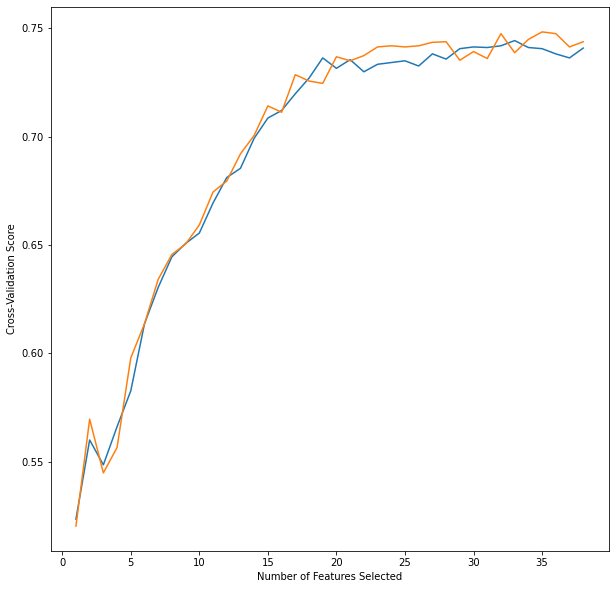

In [81]:
# Plot number of features VS. cross-validation scores
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.xlabel("Number of Features Selected")
plt.ylabel("Cross-Validation Score")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [82]:
# Now you can use the rfecv to make new predictions. 
# For example, check the performance on your test set.    
y_true, y_pred = y_test , rfecv.predict(x_test)

# Confustion Matrix
from sklearn.metrics import f1_score,confusion_matrix
cm = confusion_matrix(y_true,y_pred)
print('Confusion Matrix:\n', cm, '\n')
#sns.heatmap(cm,annot=True,fmt="d", annot_kws={"size": 12}) # font size

# Classification Report
from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

Confusion Matrix:
 [[890 382]
 [303 925]] 

Results on the test set:
              precision    recall  f1-score   support

          No       0.75      0.70      0.72      1272
         Yes       0.71      0.75      0.73      1228

    accuracy                           0.73      2500
   macro avg       0.73      0.73      0.73      2500
weighted avg       0.73      0.73      0.73      2500



Conclusion:

Using F-Test, Chi-Squared Test, and Mutual information methods for feature selection resulted in an mediocre performance. However, when using RFE with cross-validation, the performance was better.

The RFE with cross-validation method for feature selection chose to use 32 out of the 38 available features, indicating that the sklearn top 8 (k) features found with the other methods, were not enough to optimize performance.